# Image Segmentation Techniques
## Region Growing & Self-Supervised Segmentation

This notebook demonstrates the implementation and comparison of two image segmentation techniques:

1. Region Growing (Traditional Method)
2. Self-Supervised Segmentation (Deep Learning Method)

The objective is to understand how each method segments images and to analyze their performance, strengths, and limitations.


## 1. Introduction

Image segmentation is a computer vision technique used to divide an image into meaningful regions.

Instead of analyzing the whole image at once, segmentation allows us to isolate objects or areas of interest.

This is important in applications such as:

- Medical imaging
- Object detection
- Satellite imagery
- Industrial inspection

In this notebook, we explore both a classical pixel-based method and a modern AI-based method.


## 2. Region Growing Segmentation

Region Growing is a traditional image segmentation technique that groups pixels based on similarity.

It begins with a selected pixel called a **seed point** and expands outward by adding neighboring pixels that have similar intensity values.

### Key Idea

Pixels are added to the region if:

- They are close to the seed
- Their intensity difference is below a defined threshold

This method works best on grayscale images with clear intensity differences.


In [1]:
!pip install lightly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.3/859.3 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.6/165.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.3/857.3 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 46.5 MB/s eta 0:00:00


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as T
from sklearn.cluster import KMeans


## 3. Libraries Used

The following libraries were used:

- OpenCV → Image processing
- NumPy → Numerical operations
- Matplotlib → Image visualization

These tools allow efficient image loading, processing, and display.


## 4. Load Test Image

We load a grayscale image to demonstrate Region Growing segmentation.

Grayscale is preferred because segmentation is based on pixel intensity rather than color.

The test image contains distinct regions that allow us to observe the segmentation process clearly.


In [3]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png -O lena.png


--2026-02-16 01:08:25--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K  --.-KB/s    in 0.1s    

2026-02-16 01:08:25 (3.88 MB/s) - ‘lena.png’ saved [473831/473831]



In [4]:
image = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)


## 5. Region Growing Implementation

The Region Growing algorithm was implemented using a custom function.

### Steps Performed:

1. Get image dimensions
2. Initialize segmented output image
3. Track visited pixels
4. Start from seed point
5. Compare neighboring pixel intensities
6. Add similar pixels to the region

The process continues until no more pixels satisfy the similarity condition.


## Region Growing Segmentation
Region growing expands pixels from a seed point
based on intensity similarity.


In [5]:
def region_growing(img, seed, threshold):
    h, w = img.shape
    segmented = np.zeros((h, w), np.uint8)
    visited = np.zeros((h, w), bool)

    seed_intensity = img[seed]
    stack = [seed]

    while stack:
        x, y = stack.pop()

        if visited[x, y]:
            continue

        visited[x, y] = True
        segmented[x, y] = 255

        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy

                if 0 <= nx < h and 0 <= ny < w:
                    if not visited[nx, ny]:
                        if abs(int(img[nx, ny]) - int(seed_intensity)) <= threshold:
                            stack.append((nx, ny))

    return segmented


## 6. Apply Region Growing

We now apply the Region Growing algorithm using:

- A selected seed point
- An intensity threshold

The threshold controls how similar neighboring pixels must be to join the region.


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

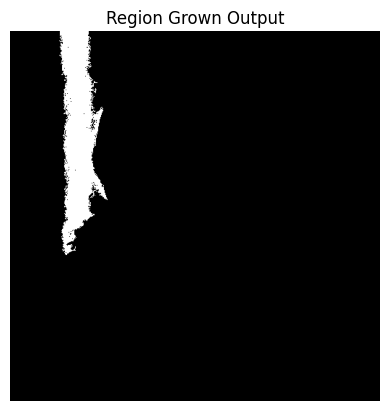

In [6]:
seed_point = (100, 100)
threshold = 10

segmented = region_growing(image, seed_point, threshold)

plt.imshow(segmented, cmap='gray')
plt.title("Region Grown Output")
plt.axis("off")


## 8. Self-Supervised Segmentation (SSL)

Self-Supervised Segmentation is a deep learning approach that does not require labeled datasets.

Instead of relying on pixel intensity, SSL models learn visual features automatically from images.

We demonstrate this using a pretrained SSL backbone (e.g., DINO).


## 9. Libraries for SSL

The following libraries were used:

- PyTorch → Deep learning framework
- Torchvision → Pretrained models
- Lightly → Self-supervised learning tools
- NumPy & Matplotlib → Visualization


## 10. Feature Extraction

Images are passed through the pretrained SSL backbone to extract embeddings.

Embeddings are numerical representations of visual patterns such as:

- Texture
- Shape
- Edges
- Structures

These features are later used for clustering-based segmentation.


In [7]:
model = torch.hub.load('facebookresearch/dino:main', 'dino_vits8')
model.eval()


Downloading: "https://github.com/facebookresearch/dino/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall8_pretrain/dino_deitsmall8_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall8_pretrain.pth


100%|██████████| 82.7M/82.7M [00:00<00:00, 104MB/s]


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(8, 8), stride=(8, 8))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
  (head): Identity()
)

## 11. Clustering for Segmentation

After feature extraction, clustering is applied to group similar embeddings.

Pixels with similar learned features form the same segment.

This produces segmentation without manual labeling.


In [8]:
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((224, 224)),
    T.ToTensor()
])

img = cv2.imread("lena.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_tensor = transform(img_rgb).unsqueeze(0)


In [9]:
with torch.no_grad():
    features = model(input_tensor)


(np.float64(-0.5), np.float64(383.5), np.float64(0.5), np.float64(-0.5))

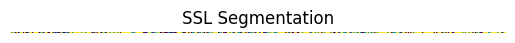

In [10]:
embeddings = features.squeeze().numpy().reshape(-1, 1)

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(embeddings)

seg_map = labels.reshape(1, -1)

plt.imshow(seg_map, cmap='viridis')
plt.title("SSL Segmentation")
plt.axis("off")


## 12. Segmentation Result — SSL

The SSL method segments the image based on learned visual structures rather than raw intensity.

### Observations:

- Captures complex shapes
- Works well on natural images
- Requires pretrained models


## 14. Conclusion

This notebook explored two segmentation techniques:

- Region Growing   simple and intensity-based
- Self-Supervised Segmentation  feature-based and AI-driven

Region Growing is easy to implement but sensitive to thresholds.

SSL segmentation is more powerful but computationally intensive.

Both approaches highlight important concepts in image segmentation.
